<a href="https://colab.research.google.com/github/VoTanThinh/googlecolab/blob/main/CON_L%E1%BA%AEC_NG%C6%AF%E1%BB%A2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6b25c7d49f1115ce2d6b9185b25385a0ad7a95c54c353a387a8e7ef83ed66ac8
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-61-c0ba2efd7775>:50: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-61-c0ba2efd7775>:51: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-61-c0ba2efd7775>:52: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


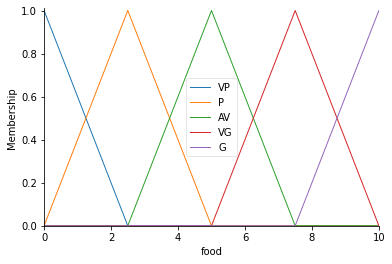

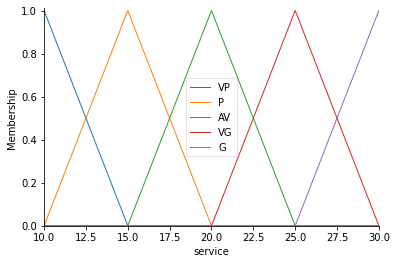

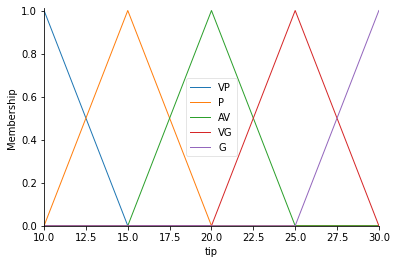

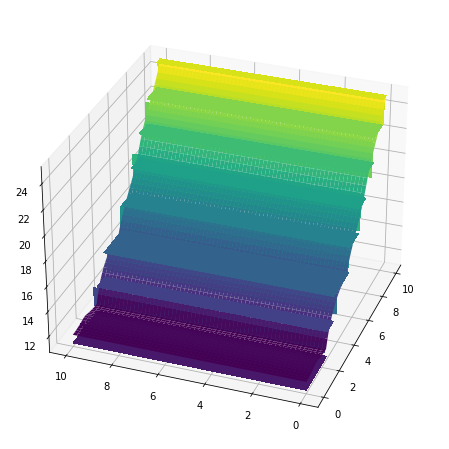

In [61]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

food = np.linspace(0,10,61) # chia khoang 0-10 thanhf 61 phaanf thuw
service = np.linspace(10,30,61)
tip = np.linspace(10,30,61)

food = ctrl.Antecedent(food,'food')
service = ctrl.Antecedent(service,'service')
tip = ctrl.Consequent(tip,'tip')

names = ['VP','P','AV','VG','G'] # gia tri phai laf ler 
food.automf(names=names) # chia khoan cho tung bieeur ddofo teen dg bieu do
service.automf(names=names)
tip.automf(names=names)

food.view()
service.view()
tip.view() #cho hieenr thij 

#lamf luataj 
#quy luat
rule0 = ctrl.Rule(antecedent=((food['VP']&service['VP'])|(food['VP']&service['P'])|(food['P']&service['VP'])),consequent=tip['VP'], label= 'rule VP') #khúc này làm luật
rule1 = ctrl.Rule(antecedent=((food['AV']&service['VP'])|(food['P']&service['P'])|(food['VP']&service['AV'])|(food['P']&service['G'])),consequent=tip['P'],label = 'rule P')
rule2 = ctrl.Rule(antecedent=((food['VP']&service['VG'])|(food['VP']&service['G'])|(food['P']&service['AV'])|(food['P']&service['VG'])
                              |(food['AV']&service['P'])|(food['AV']&service['AV'])|(food['VG']&service['VP'])|(food['VG']&service['P'])|(food['G']&service['AV'])),consequent=tip['AV'],label = 'rule AV')

rule3 = ctrl.Rule(antecedent=((food['AV']&service['VG'])|(food['VG']&service['AV'])|(food['VG']&service['VG'])|(food['G']&service['VP'])|(food['G']&service['P'])),consequent=tip['VG'],label ='rule VG')
rule4 = ctrl.Rule(antecedent=((food['AV']&service['G'])|(food['VG']&service['G'])|(food['G']&service['G'])|(food['G']&service['VG'])),consequent=tip['G'],label = 'rule G')
system = ctrl.ControlSystem(rules=[rule0,rule1,rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['tip']
#phaanf hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d') #vị trí tọa độ 1 1 1
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)

<ipython-input-65-c2696642eb3f>:54: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-65-c2696642eb3f>:55: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-65-c2696642eb3f>:56: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


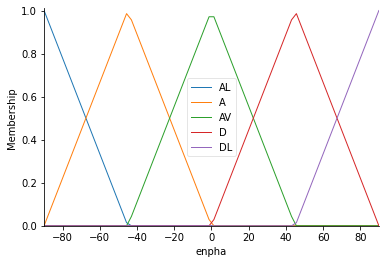

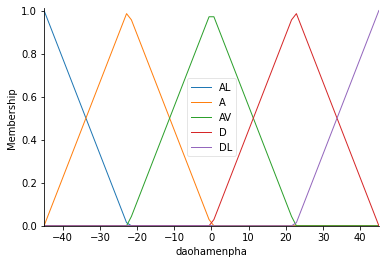

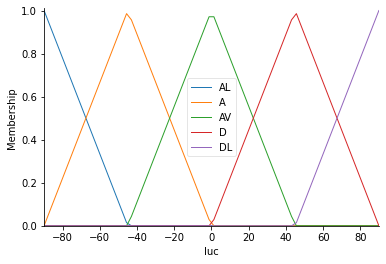

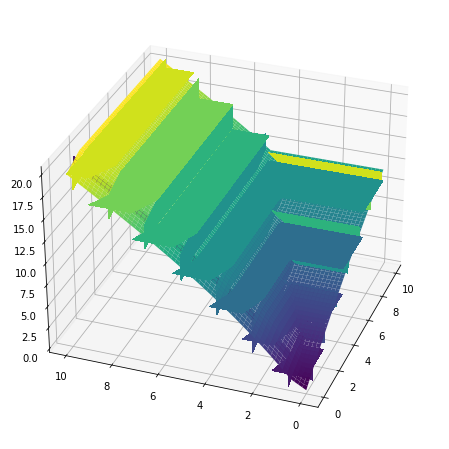

In [65]:
# CON LẮC NGƯỢC
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

enpha = np.linspace(-90,90,70) # chia khoang 0-10 thanhf 61 phaanf thuw
daohamenpha= np.linspace(-45,45,70)
luc= np.linspace(-90,90,70)

enpha= ctrl.Antecedent(enpha,'enpha')
daohamenpha = ctrl.Antecedent(daohamenpha,'daohamenpha')
luc = ctrl.Consequent(luc,'luc')

names = ['AL','A','AV','D','DL'] # gia tri phai laf ler 
enpha.automf(names=names) # chia khoan cho tung bieeur ddofo teen dg bieu do
daohamenpha.automf(names=names)
luc.automf(names=names)

enpha.view()
daohamenpha.view()
luc.view()

#làm luật
rule0 = ctrl.Rule(antecedent=((enpha['AL']&daohamenpha['AL'])|(enpha['A']&daohamenpha['AL'])|(enpha['AL']&daohamenpha['DL'])|(enpha['AL']&daohamenpha['D'])),consequent=luc['AL'], label= 'rule AL')  #khúc này làm luật
rule1 = ctrl.Rule(antecedent=((enpha['AV']&daohamenpha['AL'])|(enpha['A']&daohamenpha['A'])|(enpha['AL']&daohamenpha['A'])|(enpha['A']&daohamenpha['AV'])|(enpha['A']&daohamenpha['D'])),consequent=luc['A'], label= 'rule A')
rule2 = ctrl.Rule(antecedent=((enpha['D']&daohamenpha['AL'])|(enpha['DL']&daohamenpha['AL'])|(enpha['AV']&daohamenpha['A'])|(enpha['D']&daohamenpha['A'])|(enpha['AV']&daohamenpha['AV'])|(enpha['A']&daohamenpha['DL']))
,consequent=luc['AV'], label= 'rule AV')



rule3 = ctrl.Rule(antecedent=((enpha['DL']&daohamenpha['A'])|(enpha['D']&daohamenpha['AV'])|(enpha['D']&daohamenpha['D'])|(enpha['AV']&daohamenpha['D'])|(enpha['AV']&daohamenpha['DL'])),consequent=luc['D'], label= 'rule D')
rule4 = ctrl.Rule(antecedent=((enpha['DL']&daohamenpha['AV'])|(enpha['DL']&daohamenpha['DL'])|(enpha['D']&daohamenpha['DL'])),consequent=luc['DL'], label= 'rule DL')
system = ctrl.ControlSystem(rules=[rule0,rule1,rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):                           #61 LÀ ĐỘ PHÂN GIẢI
    sim.input['enpha'] = x[i,j]
    sim.input['daohamenpha'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['luc']


#phaanf hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d') #vị trí tọa độ 1 1 1
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)
